In [44]:
#write url where data is logged:
#for example: 
url="https://gist.githubusercontent.com/Neyt/736dd1336074f3d8750bf082ce38d66f/raw/7d406b85ea9a6525f48c0336b671eb32cf882d07/GBPUSD_Candlestick_15_M_BID_01.08.2013-01.09.2018.csv"
#(just replace whats in between " ")


In [45]:
### Write Hypotesis:

In [46]:
#First import libraies#First  
import io #to request data from a link
import requests #to request data from a link
import csv
import os #to see working directory where we are located
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np #for scientific computing with Python. It contains among other things: a powerful N-dimensional array object.
import pandas as pd #You can use pandas data structures but freely draw on Numpy and Scipy functions to manipulate them
import seaborn as sns #statistical data visualization.
from scipy import stats #to discard outliers
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
# matplotlib Enable inline plotting
%matplotlib inline
# pylanb inline is a command that lets you show plots in ipython notebook.
%pylab inline 
#sets size in all documents graph
pylab.rcParams['figure.figsize'] = (18.5, 10.5)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['datetime', 'trace']
`%matplotlib` prevents importing * from pylab and numpy



In [47]:
#where are we working?
os.getcwd()

'C:\\Users\\ney12\\Google Drive\\1) Financial Mastery\\3) paper assets, trading, Other assets\\forex\\Van tharp Forex trading system\\Ney study of van tharp forex trading system\\Forex-initial-analysis'

In [48]:
#review what python version we are using, Pandas and Matplotlib
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.23.4
Matplotlib version 2.2.2


In [49]:

#set up format#set up 
sns.set(style="white", color_codes=True) #sets the background color https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 6.]

In [50]:
#import the data and read it and example#import 
#url="https://gist.githubusercontent.com/Neyt/736dd1336074f3d8750bf082ce38d66f/raw/7d406b85ea9a6525f48c0336b671eb32cf882d07/GBPUSD_Candlestick_15_M_BID_01.08.2013-01.09.2018.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df.head(50) #we are just printing the first 6 roads

,Local time,Open,High,Low,Close,Volume
0,01.08.2013 00:00:00.000 GMT-0500,1.51616,1.51619,1.51565,1.51573,382.83
1,01.08.2013 00:15:00.000 GMT-0500,1.51572,1.51614,1.51568,1.51592,455.35
2,01.08.2013 00:30:00.000 GMT-0500,1.51592,1.51619,1.51545,1.51615,508.97
3,01.08.2013 00:45:00.000 GMT-0500,1.51622,1.51645,1.51589,1.51635,498.39
4,01.08.2013 01:00:00.000 GMT-0500,1.51633,1.51669,1.51573,1.51597,980.75
5,01.08.2013 01:15:00.000 GMT-0500,1.51597,1.51628,1.51569,1.51620,684.20
6,01.08.2013 01:30:00.000 GMT-0500,1.51619,1.51667,1.51533,1.51593,841.50
7,01.08.2013 01:45:00.000 GMT-0500,1.51593,1.51593,1.51343,1.51404,1385.55
8,01.08.2013 02:00:00.000 GMT-0500,1.51407,1.51492,1.51343,1.51489,2307.75
9,01.08.2013 02:15:00.000 GMT-0500,1.51488,1.51562,1.51457,1.51487,1581.04


In [51]:
#variables in the spread sheet:
df.info() #and type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178368 entries, 0 to 178367
Data columns (total 6 columns):
Local time    178368 non-null object
Open          178368 non-null float64
High          178368 non-null float64
Low           178368 non-null float64
Close         178368 non-null float64
Volume        178368 non-null float64
dtypes: float64(5), object(1)
memory usage: 8.2+ MB


In [52]:
#Now we are going to see how much data is in the DataFrame and how mush is incomplete (Nan)
print ("Number of columns (variables):", df.shape[1]) #gives number of column count
Number_of_players = len(df)
print ("Number of rows (players):", len(df))
print ("how many Nan are in the DataFrame:")
df.isnull().sum()

Number of columns (variables): 6
Number of rows (players): 178368
how many Nan are in the DataFrame:


Local time    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

In [53]:
#drop the NaN
df=df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [54]:
#now lets verify that we dropped all the incomplete data:
    
print ("Number of columns (variables) after dropping Nan:", df.shape[1]) #gives number of col count
Number_of_players = len(df)
print ("Number of rows (players) after dropping Nan:", len(df))
print ("how many Nan are in the DataFrame:")
df.isnull().sum()

Number of columns (variables) after dropping Nan: 6
Number of rows (players) after dropping Nan: 178368
how many Nan are in the DataFrame:


Local time    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

In [55]:
df.describe() #we can see the data statistics

,Open,High,Low,Close,Volume
count,178368.000000,178368.000000,178368.000000,178368.000000,178368.000000
mean,1.453749,1.454102,1.453401,1.453748,1220.619616
std,0.145749,0.145722,0.145780,0.145749,1785.585819
min,1.199720,1.201440,1.191980,1.200430,0.000000
25%,1.316828,1.317300,1.316290,1.316830,0.000000
50%,1.449960,1.449980,1.449885,1.449960,807.655000
75%,1.568880,1.569320,1.568760,1.568880,1775.472500
max,1.717650,1.719100,1.717460,1.717650,298760.367500


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



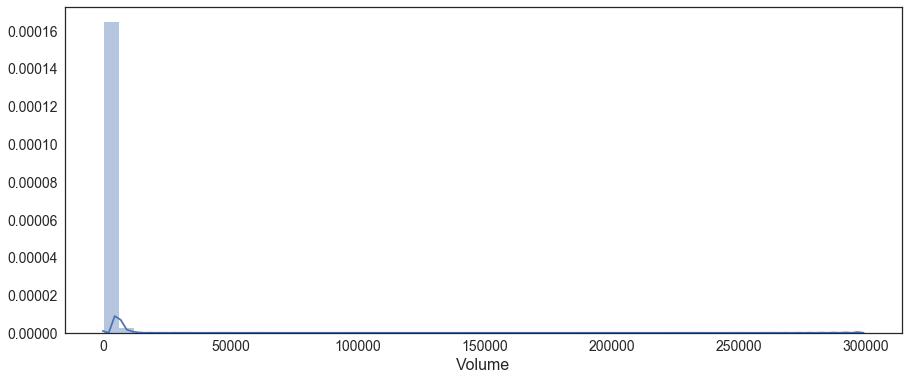

In [56]:
#create a histogram to undestrand Volume distibution
sns.distplot(df.Volume);

In [57]:
#take outliers off
df = df[np.abs(df.Volume-df.Volume.mean())<=(3*df.Volume.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'df.height'.
#df = df[np.abs(df.weight-df.weight.mean())<=(3*df.weight.std())]

In [58]:
df.describe() #we can see the data statistics

,Open,High,Low,Close,Volume
count,176095.000000,176095.000000,176095.000000,176095.000000,176095.000000
mean,1.454764,1.455106,1.454427,1.454763,1121.407913
std,0.145818,0.145794,0.145844,0.145817,1233.093493
min,1.199720,1.201440,1.191980,1.200430,0.000000
25%,1.317690,1.318115,1.317200,1.317690,0.000000
50%,1.450620,1.450750,1.450060,1.450620,789.920000
75%,1.569880,1.570390,1.569445,1.569890,1725.430000
max,1.717650,1.719100,1.717460,1.717650,6576.320000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



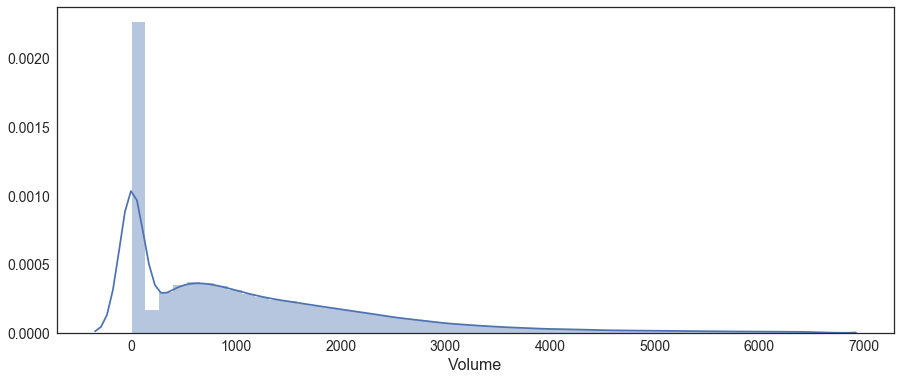

In [59]:
#create a histogram to undestrand Volume distibution
sns.distplot(df.Volume);

In [60]:
#describe columns with text and data.
df.describe(include = 'all')

,Local time,Open,High,Low,Close,Volume
count,176095,176095.000000,176095.000000,176095.000000,176095.000000,176095.000000
unique,176095,NaN,NaN,NaN,NaN,NaN
top,28.03.2014 00:30:00.000 GMT-0500,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.454764,1.455106,1.454427,1.454763,1121.407913
std,NaN,0.145818,0.145794,0.145844,0.145817,1233.093493
min,NaN,1.199720,1.201440,1.191980,1.200430,0.000000
25%,NaN,1.317690,1.318115,1.317200,1.317690,0.000000
50%,NaN,1.450620,1.450750,1.450060,1.450620,789.920000
75%,NaN,1.569880,1.570390,1.569445,1.569890,1725.430000


In [61]:
#describe only columns with text on them
df.describe(include = ['O'])

,Local time
count,176095
unique,176095
top,28.03.2014 00:30:00.000 GMT-0500
freq,1


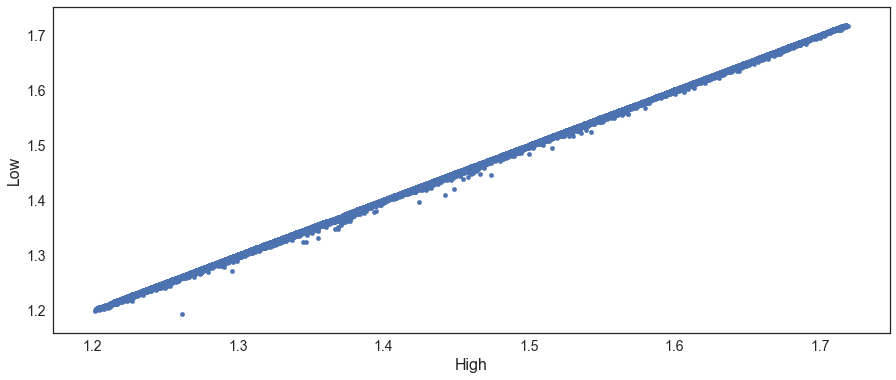

In [62]:
#spread
#df.plot.hist()
#df.plot.line()
df.plot.scatter(x='High', y='Low');


In [63]:
#how many candles are in the data?
print (len(df))

176095


In [64]:
# Here I will create a function that needs to variables, windows(number of candles to the left and to the right needed 
# to define a high or a low) and df (data)

def differentWindows(windows, df):
    df=pd.read_csv(io.StringIO(s.decode('utf-8')))
    window = windows  #this should be the number of rows in column "High"
    itereration = 0
    number_of_lows = 0
    for iteration in range(window, len(df) - window): # iterate over the initial dataframe from window to len(df) - window
        n = df['Low'][iteration] # taken the values to compare, the value to analyse
        flag = False
        window = windows
        while (window > 0): # looping in that window to check all values in window
            #print ("1",df['Low'][iteration-window])
            #print ("2",df['Low'][iteration+window])
            #print ("3", n)
            if(df['Low'][iteration-window] >= n): # checking for values before the n
                flag = False
            else:
                flag = True # if any value is smaller than the n
                break
            if(df['Low'][iteration+window] >= n): # checking for values after the n
                flag = False
            else:
                flag = True
                break
            window -= 1
        if(flag == False): # if flag is false than the value to be analysed is always lowest
            number_of_lows += 1
        else:
            number_of_lows += 0
    return number_of_lows
#we create a list to save how many lows are there        
list_count = []
window_list = [1, 2, 3, 4, 5, 6]
for window in window_list:
    list_count.append(differentWindows(window,df))

print (list_count)

[82143, 69242, 63549, 60038, 57675, 55928]


In [65]:
list_count_percentage = []
#then we show it as a percentage
for item in list_count:
    list_count_percentage.append((item/len(df))*100)
    
# print (list_count_percentage)
for window, item in zip(window_list, list_count_percentage):
    print ("For window ", window, "->", str(item) + "%")
#print("{:.2%}".format(list_count_percentage)) how do I print as a percetage without turning into a string?

For window  1 -> 46.64698032312104%
For window  2 -> 39.32082114767597%
For window  3 -> 36.08790709560181%
For window  4 -> 34.09409693631279%
For window  5 -> 32.7522076152077%
For window  6 -> 31.76012947556717%


In [85]:
df.rename(columns = {'Local time':'time'}, inplace=True) #I rename the column, becuase I dont know to asign names with spaces, we need that bellow in the trace variable

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [87]:
#code to color the low bars only
#you need to install ploty in your computer first https://plot.ly/python/getting-started/

#source code from https://plot.ly/python/candlestick-charts/, Custom Candlestick Colors
#plotly.tools.set_credentials_file(username='ney123456789', api_key='eVqpi4L1R7LxTCxPVUFV')

import plotly.plotly as py
import plotly.graph_objs as go

import pandas_datareader as web
from datetime import datetime

#we lower the datapoints or the image wont show
df = df[0:10000]

trace = go.Candlestick(x=df.time,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close,
                       increasing=dict(line=dict(color= '#17BECF')),
                       decreasing=dict(line=dict(color= '#7F7F7F')))
data = [trace]
py.iplot(data, filename='styled_candlestick')